# Data Analytics II
**1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
<br>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score, precision_score, recall_score, f1_score

## Loading the Dataset
The Social Network Ads dataset describes whether users have purchased a product by clicking on the advertisements shown to them on social media.

In [10]:
df = pd.read_csv("Social_Network_Ads.csv")

In [11]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## EDA

In [12]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [13]:
df.isnull().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

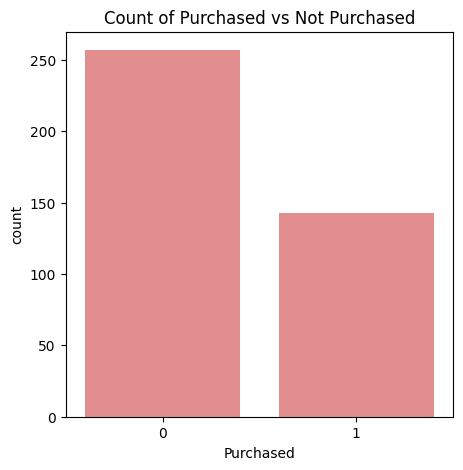

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(x='Purchased', data=df, color='lightcoral')
plt.title('Count of Purchased vs Not Purchased')
plt.show()

## Data Preprocessing

In [17]:
# extract independent and dependent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
# split the dataset into the train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Feature Scaling** <br>
We normalize the range of the independent variables so that they contribute equally to the result

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

In [23]:
# train
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [25]:
# predict
y_pred = classifier.predict(x_test)

### Results

In [29]:
print("Expected   Predicted")
for i in range(10):
    print(f"{y_test[i]}          {y_pred[i]}")

Expected   Predicted
0          0
0          0
0          0
0          0
0          0
0          0
0          0
1          1
0          0
0          0


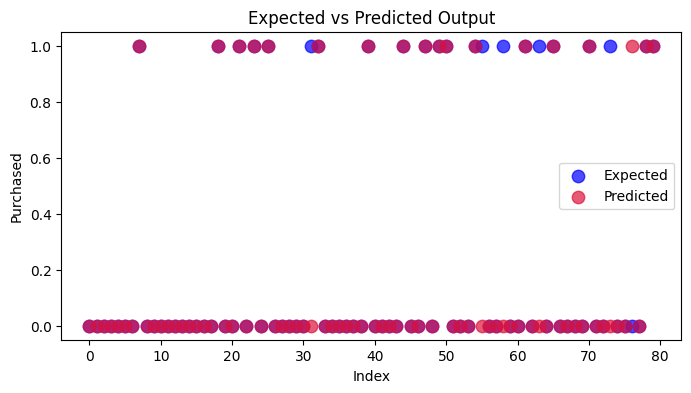

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.7, s=80, label='Expected')
plt.scatter(range(len(y_pred)), y_pred, color='crimson', alpha=0.7, s=80, label='Predicted')
plt.title('Expected vs Predicted Output')
plt.xlabel('Index')
plt.ylabel('Purchased')
plt.legend()
plt.show()

### Confusion Matrix

In [53]:
# calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[57  1]
 [ 5 17]]


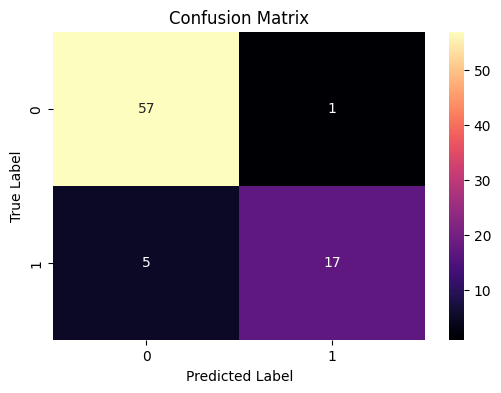

In [57]:
# visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='magma', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
# performance metrics report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



In [65]:
tp,fn,fp,tn=confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)

print('\nAccuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Error Rate = {:.4f}'.format((fp+fn)/(tp+tn+fn+fp)))
print('Sensitivity (Recall or TPR) = {:.4f}'.format(tp/(tp+fn)))
print('Specificity (TNR) = {:.4f}'.format(tn/(fp+tn)))
print('Precision (Positive predictive value) = {:.4f}'.format(tp/(tp+fp)))
print('False Positive Rate = {:.4f}'.format(fp/(tn+fp)))


Accuracy = 0.93
Error Rate = 0.0750
Sensitivity (Recall or TPR) = 0.7727
Specificity (TNR) = 0.9828
Precision (Positive predictive value) = 0.9444
False Positive Rate = 0.0172
